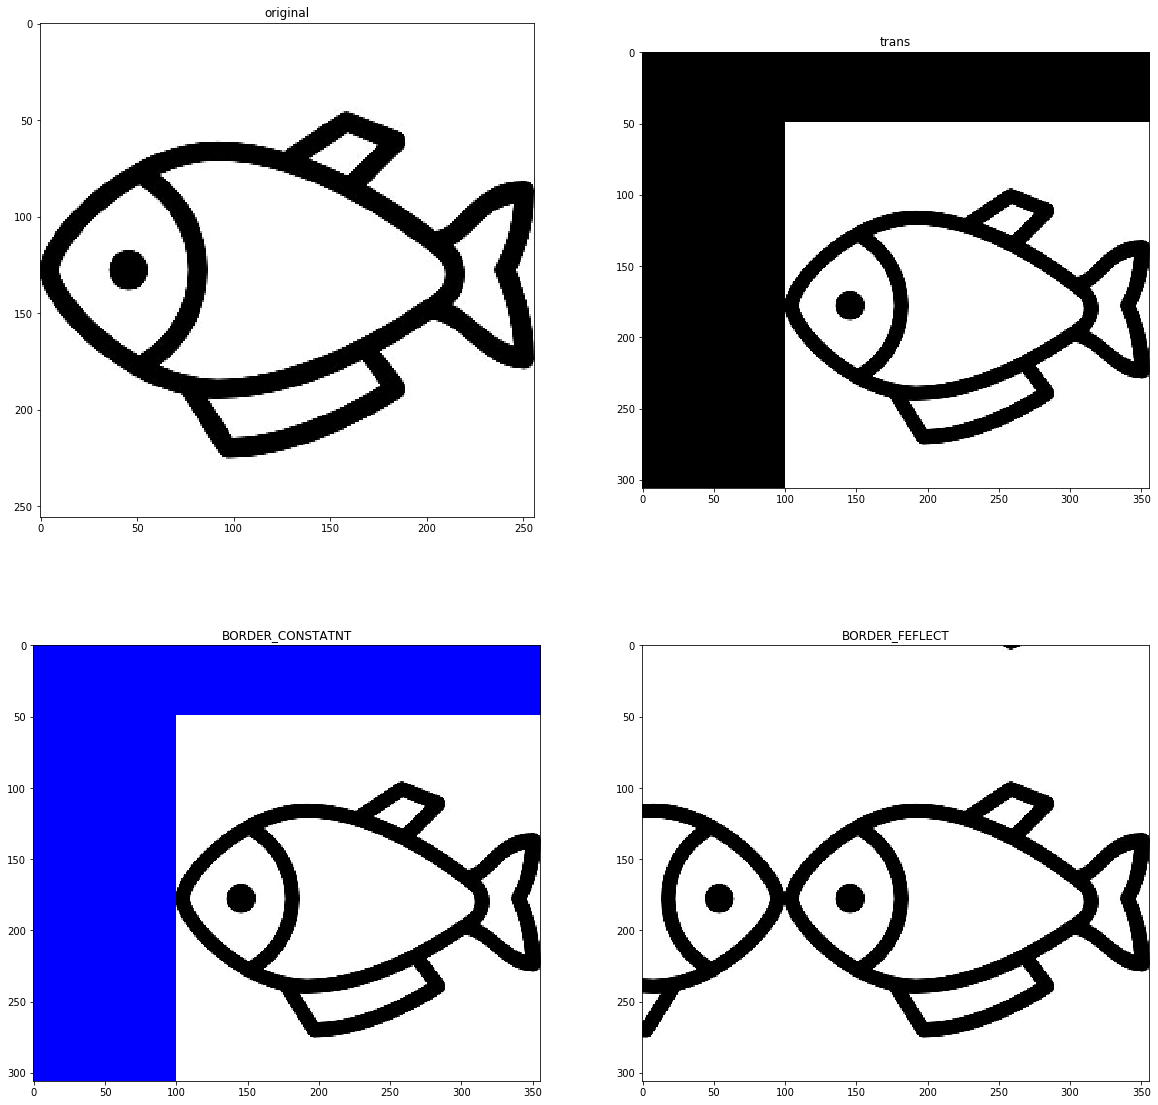

In [3]:
# matplot 빠르게 사용하기 위해 함수정의
import matplotlib.pylab as plt
def cv2tomat(img):
    b, g, r = cv2.split(img)   # img파일을 b,g,r로 분리
    img2 = cv2.merge([r,g,b]) # b, r을 바꿔서 Merge
    return img2
import cv2
import numpy as np

img = cv2.imread('./img/fish.jpg')
rows,cols = img.shape[0:2]  # 영상의 크기

dx, dy = 100, 50            # 이동할 픽셀 거리

# ---① 변환 행렬 생성 
mtrx = np.float32([[1, 0, dx],
                   [0, 1, dy]])  
# ---② 단순 이동
dst = cv2.warpAffine(img, mtrx, (cols+dx, rows+dy))   

# ---③ 탈락된 외곽 픽셀을 파랑색으로 보정
dst2 = cv2.warpAffine(img, mtrx, (cols+dx, rows+dy), None, \
                        cv2.INTER_LINEAR, cv2.BORDER_CONSTANT, (255,0,0) )

# ---④ 탈락된 외곽 픽셀을 원본을 반사 시켜서 보정
dst3 = cv2.warpAffine(img, mtrx, (cols+dx, rows+dy), None, \
                                cv2.INTER_LINEAR, cv2.BORDER_REFLECT)

# cv2.imshow('original', img)
# cv2.imshow('trans',dst)
# cv2.imshow('BORDER_CONSTATNT', dst2)
# cv2.imshow('BORDER_FEFLECT', dst3)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


images = {'original':img,'trans':dst,'BORDER_CONSTATNT':dst2,'BORDER_FEFLECT':dst3 }
for i, (k, v) in enumerate(images.items()):
    plt.subplot(2,2,i+1)
    plt.title(k)
    plt.imshow(cv2tomat(v))
plt.rcParams["figure.figsize"] = (10,10)
plt.show()    


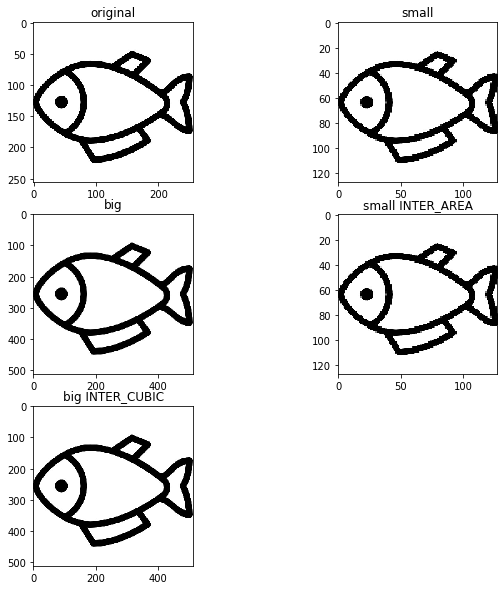

In [7]:
import cv2
import numpy as np

img = cv2.imread('./img/fish.jpg')
height, width = img.shape[:2]

# --① 0.5배 축소 변환 행렬
m_small = np.float32([[0.5, 0, 0],
                       [0, 0.5,0]])  
# --② 2배 확대 변환 행렬
m_big = np.float32([[2, 0, 0],
                     [0, 2, 0]])  

# --③ 보간법 적용 없이 확대 축소
dst1 = cv2.warpAffine(img, m_small, (int(height*0.5), int(width*0.5)))
dst2 = cv2.warpAffine(img, m_big, (int(height*2), int(width*2)))

# --④ 보간법 적용한 확대 축소
dst3 = cv2.warpAffine(img, m_small, (int(height*0.5), int(width*0.5)), \
                        None, cv2.INTER_AREA)
dst4 = cv2.warpAffine(img, m_big, (int(height*2), int(width*2)), \
                        None, cv2.INTER_CUBIC)

# 결과 출력
cv2.imshow("original", img)
cv2.imshow("small", dst1)
cv2.imshow("big", dst2)
cv2.imshow("small INTER_AREA", dst3)
cv2.imshow("big INTER_CUBIC", dst4)
cv2.waitKey(0)
cv2.destroyAllWindows()
# matplot 빠르게 사용하기 위해 함수정의
import matplotlib.pylab as plt
def cv2tomat(img):
    b, g, r = cv2.split(img)   # img파일을 b,g,r로 분리
    img2 = cv2.merge([r,g,b]) # b, r을 바꿔서 Merge
    return img2
images = {'original':img,'small':dst1,'big':dst2,'small INTER_AREA':dst3,'big INTER_CUBIC':dst4 }
for i, (k, v) in enumerate(images.items()):
    plt.subplot(3,2,i+1)
    plt.title(k)
    plt.imshow(cv2tomat(v))
plt.rcParams["figure.figsize"] = (10,10)
plt.show()    


In [9]:
import cv2
import numpy as np

img = cv2.imread('./img/fish.jpg')
height, width = img.shape[:2]

#--① 크기 지정으로 축소
#dst1 = cv2.resize(img, (int(width*0.5), int(height*0.5)),\
#                        None, 0, 0, cv2.INTER_AREA)
dst1 = cv2.resize(img, (int(width*0.5), int(height*0.5)), \
                         interpolation=cv2.INTER_AREA)

#--② 배율 지정으로 확대
dst2 = cv2.resize(img, None,  None, 2, 2, cv2.INTER_CUBIC)
#--③ 결과 출력
cv2.imshow("original", img)
cv2.imshow("small", dst1)
cv2.imshow("big", dst2)
cv2.waitKey(0)
cv2.destroyAllWindows()

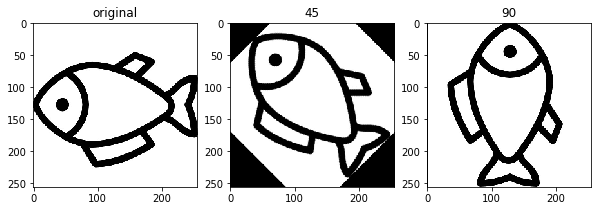

In [11]:
import cv2
import numpy as np

img = cv2.imread('./img/fish.jpg')
rows,cols = img.shape[0:2]

# ---① 라디안 각도 계산(60진법을 호도법으로 변경)
d45 = 45.0 * np.pi / 180    # 45도
d90 = 90.0 * np.pi / 180    # 90도

# ---② 회전을 위한 변환 행렬 생성
m45 = np.float32( [[ np.cos(d45), -1* np.sin(d45), rows//2],
                    [np.sin(d45), np.cos(d45), -1*cols//4]])
m90 = np.float32( [[ np.cos(d90), -1* np.sin(d90), rows],
                    [np.sin(d90), np.cos(d90), 0]])

# ---③ 회전 변환 행렬 적용
r45 = cv2.warpAffine(img,m45,(cols,rows))
r90 = cv2.warpAffine(img,m90,(rows,cols))

# ---④ 결과 출력
# cv2.imshow("origin", img)
# cv2.imshow("45", r45)
# cv2.imshow("90", r90)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# matplot 빠르게 사용하기 위해 함수정의
import matplotlib.pylab as plt
def cv2tomat(img):
    b, g, r = cv2.split(img)   # img파일을 b,g,r로 분리
    img2 = cv2.merge([r,g,b]) # b, r을 바꿔서 Merge
    return img2
images = {'original':img,'45':r45,'90':r90}
for i, (k, v) in enumerate(images.items()):
    plt.subplot(1,3,i+1)
    plt.title(k)
    plt.imshow(cv2tomat(v))
plt.rcParams["figure.figsize"] = (10,10)
plt.show()    


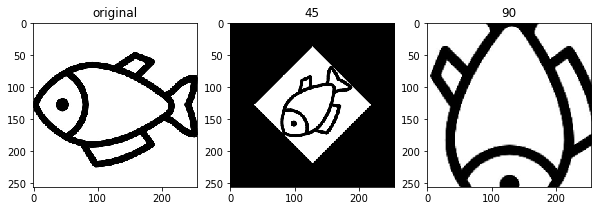

In [13]:
import cv2

img = cv2.imread('./img/fish.jpg')
rows,cols = img.shape[0:2]

#---① 회전을 위한 변환 행렬 구하기
# 회전축:중앙, 각도:45, 배율:0.5
m45 = cv2.getRotationMatrix2D((cols/2,rows/2),45,0.5) 
# 회전축:중앙, 각도:90, 배율:1.5
m90 = cv2.getRotationMatrix2D((cols/2,rows/2),90,1.5) 

#---② 변환 행렬 적용
img45 = cv2.warpAffine(img, m45,(cols, rows))
img90 = cv2.warpAffine(img, m90,(cols, rows))

#---③ 결과 출력
# cv2.imshow('origin',img)
# cv2.imshow("45", img45)
# cv2.imshow("90", img90)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# matplot 빠르게 사용하기 위해 함수정의
import matplotlib.pylab as plt
def cv2tomat(img):
    b, g, r = cv2.split(img)   # img파일을 b,g,r로 분리
    img2 = cv2.merge([r,g,b]) # b, r을 바꿔서 Merge
    return img2
images = {'original':img,'45':img45,'90':img90}
for i, (k, v) in enumerate(images.items()):
    plt.subplot(1,3,i+1)
    plt.title(k)
    plt.imshow(cv2tomat(v))
plt.rcParams["figure.figsize"] = (10,10)
plt.show()    
